In [1]:
%matplotlib inline

from __future__ import print_function

import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler, MaxAbsScaler, minmax_scale, maxabs_scale
from sklearn.metrics import mean_squared_error
from sklearn.cluster import MiniBatchKMeans
import matplotlib
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Dropout, BatchNormalization
from keras.layers.advanced_activations import PReLU
from keras.optimizers import Nadam

import pep2space as pep

MAX_POS=12

Using Theano backend.
WARNING (theano.sandbox.cuda): The cuda backend is deprecated and will be removed in the next release (v0.10).  Please switch to the gpuarray backend. You can get more information about how to switch at this URL:
 https://github.com/Theano/Theano/wiki/Converting-to-the-new-gpu-back-end%28gpuarray%29

Using gpu device 0: Tesla K20Xm (CNMeM is enabled with initial size: 95.0% of memory, cuDNN 5105)


### Coordinates
**straight** - predict each coordinate.

- naive approach: surround sequences by null symbols

- "omega loops": first and last amino acids depends on each other other

**difference** - ??? (predict differences between neighbour coordinates)


### Amino acid transformations
**one-hot** - code each amino acid as a 20-dimensional vector with 1 at the index of the corresponding amino acid.

**kidera** - worked worse than one-hot.

**embeddings** - infer embeddings on the overall data.


### Feature generation
**window** - sliding window, predict the coordinate in the centre of the window.

**directional / bidirectional** - ??? (RNN)


### Feature preprocessing
**scale the data**:
Tested on models with [128,64] dense layers, 4-4 window size, 2000 iterations.
- per column - scale each column independently:
```
MSE:
no scale:
    cdr - 1.61775   ***
    can - 0.0993797
MinMax:
    cdr - 2.43089   *
    can - 0.0978544
MaxAbs:
    cdr - 1.95208   **
    can - 0.0967865
```
- overall - scale the overall matrix:
```
no scale:
    cdr - 1.61775   ***
    can - 0.0993797
MinMax:
    cdr - 2.27693   *
    can - 0.105339
MaxAbs:
    cdr - 1.96837   **
    can - 0.0973526
```

**clusterize** - ??? (assign weights accroding to the clusters' sizes)


### Batch generation
**add putative sequences to batches** - ??? (to add noise)


### Post-analysis
**ensembling** - ???

In [28]:
kidera_s = """
A -1.56	-1.67	-0.97	-0.27	-0.93	-0.78	-0.2	-0.08	0.21	-0.48 
R 0.22	1.27	1.37	1.87	-1.7	0.46	0.92	-0.39	0.23	0.93 
N 1.14	-0.07	-0.12	0.81	0.18	0.37	-0.09	1.23	1.1	-1.73 
D 0.58	-0.22	-1.58	0.81	-0.92	0.15	-1.52	0.47	0.76	0.7 
C 0.12	-0.89	0.45	-1.05	-0.71	2.41	1.52	-0.69	1.13	1.1 
Q -0.47	0.24	0.07	1.1	1.1	0.59	0.84	-0.71	-0.03	-2.33 
E -1.45	0.19	-1.61	1.17	-1.31	0.4	0.04	0.38	-0.35	-0.12 
G 1.46	-1.96	-0.23	-0.16	0.1	-0.11	1.32	2.36	-1.66	0.46 
H -0.41	0.52	-0.28	0.28	1.61	1.01	-1.85	0.47	1.13	1.63 
I -0.73	-0.16	1.79	-0.77	-0.54	0.03	-0.83	0.51	0.66	-1.78 
L -1.04	0	-0.24	-1.1	-0.55	-2.05	0.96	-0.76	0.45	0.93 
K -0.34	0.82	-0.23	1.7	1.54	-1.62	1.15	-0.08	-0.48	0.6 
M -1.4	0.18	-0.42	-0.73	2	1.52	0.26	0.11	-1.27	0.27 
F -0.21	0.98	-0.36	-1.43	0.22	-0.81	0.67	1.1	1.71	-0.44 
P 2.06	-0.33	-1.15	-0.75	0.88	-0.45	0.3	-2.3	0.74	-0.28 
S 0.81	-1.08	0.16	0.42	-0.21	-0.43	-1.89	-1.15	-0.97	-0.23 
T 0.26	-0.7	1.21	0.63	-0.1	0.21	0.24	-1.15	-0.56	0.19 
W 0.3	2.1	-0.72	-1.57	-1.16	0.57	-0.48	-0.4	-2.3	-0.6 
Y 1.38	1.48	0.8	-0.56	0	-0.68	-0.31	1.03	-0.05	0.53 
V -0.74	-0.71	2.04	-0.4	0.5	-0.81	-1.07	0.06	-0.46	0.65
""".split("\n")

In [4]:
MAX_POS=12

# 1-dimensional models

In [5]:
# Predicted and real coordinates
def plot_pred(df, pred, ax, title):
    trans = pred.reshape((len(df),12))
    for i in range(len(df)):
        ax.plot(range(12), df.iloc[i,4:16], c="black", alpha=.5, label="real")
        ax.plot(range(12), trans[i,:], c = "red", linestyle="dotted", alpha=.8, label="pred")
    ax.set_title(title)

## Check if scaling works better than no-transformation

### Per-column scaling

In [6]:
hist_list = {}
model_list = {}

In [ ]:
m_0 = pepm.train_model(MAX_POS, 5, "x", [128,64], 4, 4, 200, hist_list, model_list)
m_1 = pepm.train_model(MAX_POS, 5, "x", [128,64,64], 6, 6, 200, hist_list, model_list, "col", "abs")
m_2 = pepm.train_model(MAX_POS, 5, "x", [128,64], 4, 4, 500, hist_list, model_list, "col", "abs")

In [ ]:
df_cdr = pd.read_csv("data/cdr_coord_x.csv.gz")
df_can = pd.read_csv("data/can_coord_x.csv.gz")
X_cdr, y_cdr = to_vec_onehot(df_cdr, 4, 4)
X_can, y_can = to_vec_onehot(df_can, 4, 4)
print("cdr", mean_squared_error(y_cdr, m_0.predict(X_cdr)))
print("can", mean_squared_error(y_can, m_0.predict(X_can)))

# print("cdr", tr_pred_col("data/cdr_coord_x.csv.gz", MinMaxScaler, m_mm_col, 4, 4))
# print("can", tr_pred_col("data/can_coord_x.csv.gz", MinMaxScaler, m_mm_col, 4, 4))

print("cdr", tr_pred_col("data/cdr_coord_x.csv.gz", MaxAbsScaler, best_models_list["left4_right4.128-64-64.col_abs.clust_5"], 4, 4))
print("can", tr_pred_col("data/can_coord_x.csv.gz", MaxAbsScaler, best_models_list["left4_right4.128-64-64.col_abs.clust_5"], 4, 4))


# batch=64
# cdr 1.47792
# can 0.113192

## Overall scaling

In [96]:
# hist_scale = {}
# m_no = train_models("x", [128,64], 4, 4, 2000, hist_scale)
# m_mm_all = train_models_scale_all("x", [128,64], 4, 4, 2000, hist_scale, "mm")
# m_abs_all = train_models_scale_all("x", [128,64], 4, 4, 2000, hist_scale, "abs")

left4_right4.128-64_all_mm
left4_right4.128-64_all_abs


In [105]:
df_cdr = pd.read_csv("data/cdr_coord_x.csv.gz")
df_can = pd.read_csv("data/can_coord_x.csv.gz")
X_cdr, y_cdr = to_vec_onehot(df_cdr, 4, 4)
X_can, y_can = to_vec_onehot(df_can, 4, 4)
print("cdr", mean_squared_error(y_cdr, m_no.predict(X_cdr)))
print("can", mean_squared_error(y_can, m_no.predict(X_can)))

print("cdr", tr_pred("data/cdr_coord_x.csv.gz", MinMaxScaler(), m_mm_all))
print("can", tr_pred("data/can_coord_x.csv.gz", MinMaxScaler(), m_mm_all))

print("cdr", tr_pred("data/cdr_coord_x.csv.gz", MaxAbsScaler(), m_abs_all))
print("can", tr_pred("data/can_coord_x.csv.gz", MaxAbsScaler(), m_abs_all))


# cdr 1.61775
# can 0.0993797
# cdr 2.27693
# can 0.105339
# cdr 1.96837
# can 0.0973526

cdr 1.61775
can 0.0993797
cdr 2.27693
can 0.105339
cdr 1.96837
can 0.0973526


## Find which windows and layer sizes are the best

In [ ]:
# best_models = [(3,3), (4,4), (5,5), (6,6)]
# best_layers = [[64, 64, 64], [128, 64], [128, 64, 64], [256, 128], [256, 128, 64]]

# best_models = [(3,3), (4,4)]
# best_layers = [[16, 16, 16], [32, 16]]

best_models = [(4,4)]
best_layers = [[128, 64]]
best_hist = {}
best_models_list = {}
for l,r in best_models:
    for layers in best_layers:
        pep.model.train_model(MAX_POS, 0, "x", layers, l, r, 1200, best_hist, best_models_list)
        pep.model.train_model(MAX_POS, 0, "x", layers, l, r, 1200, best_hist, best_models_list, coord_fun = "omega")
        pep.model.train_model(MAX_POS, 5, "x", layers, l, r, 1200, best_hist, best_models_list)
        pep.model.train_model(MAX_POS, 5, "x", layers, l, r, 1200, best_hist, best_models_list, coord_fun = "omega")
        
# best_models = [(6,6)]
# best_layers = [[128, 64, 64], [256,128]]
# best_hist_scale = {}
# for l,r in best_models:
#     for layers in best_layers:
# #         train_models_scale_col("x", layers, l, r, 3000, best_hist_scale, "mm")
#         train_models_scale_col("x", layers, l, r, 3000, best_hist_scale, "abs")
# #         train_models_scale_all("x", layers, l, r, 3000, best_hist_scale, "mm")
# #         train_models_scale_all("x", layers, l, r, 3000, best_hist_scale, "abs")

left4_right4.128-64.no_no.onehot


# Visualize loss

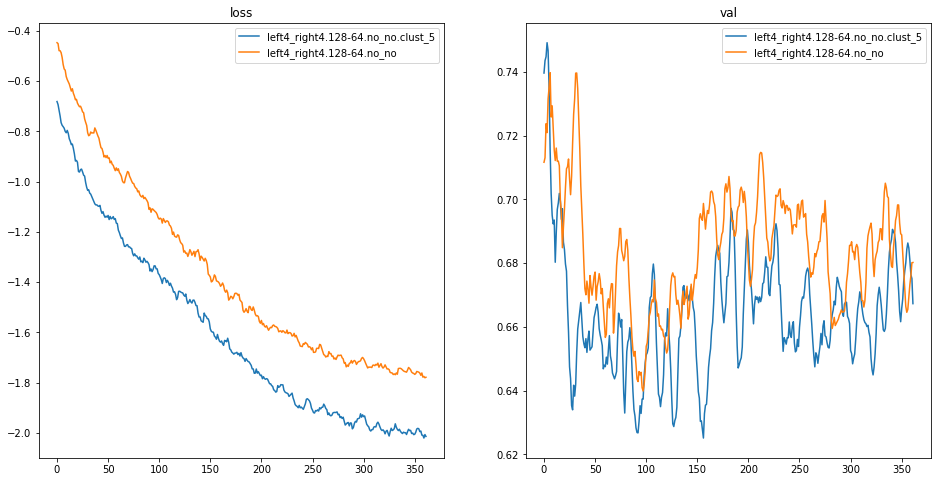

In [3]:
fig, ax = plt.subplots(nrows=1, sharex=True, ncols=2)
fig.set_figwidth(16)
fig.set_figheight(8)

def smooth(vec):
    res = []
    window = 8
    step = 3
    for i in range(window, len(vec)-window, step):
        res.append(np.mean(vec[i-window:i+window+1]))
    return res


cur_hist = best_hist
best_models = sorted([(h, np.mean(cur_hist[h].history["val_loss"][-5:])) for h in cur_hist], key=lambda x: x[1])[:10]

# for i, h in enumerate(sorted(cur_hist.keys())):
for i, (h, _) in enumerate(best_models):
    ax[0].plot(np.log2(smooth(cur_hist[h].history["loss"][100:])), label=h)
    ax[1].plot(np.log2(smooth(cur_hist[h].history["val_loss"][100:])), label=h)


ax[0].set_title("loss")
ax[1].set_title("val")
ax[0].legend()
ax[1].legend()

plt.savefig("tmp.png")

NameError: name 'best_hist_scale' is not defined

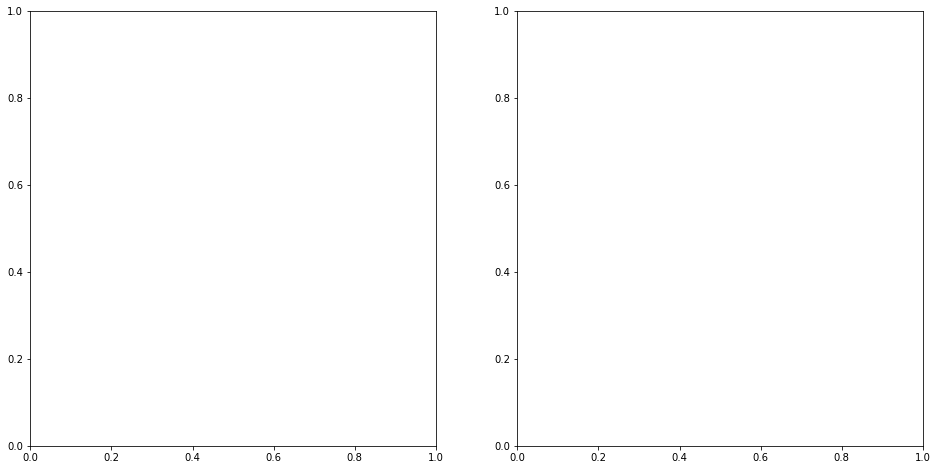

In [4]:
fig, ax = plt.subplots(nrows=1, sharex=True, ncols=2)
fig.set_figwidth(16)
fig.set_figheight(8)


cur_hist = best_hist_scale
best_models = sorted([(h, np.mean(cur_hist[h].history["val_loss"][-5:])) for h in cur_hist], key=lambda x: x[1])[:10]

# for i, h in enumerate(sorted(cur_hist.keys())):
for i, (h, _) in enumerate(best_models):
    ax[0].plot(np.log2(smooth(cur_hist[h].history["loss"][100:])), label=h)
    ax[1].plot(np.log2(smooth(cur_hist[h].history["val_loss"][100:])), label=h)


ax[0].set_title("loss")
ax[1].set_title("val")
ax[0].legend()
ax[1].legend()

plt.savefig("loss_dense_onehot_scale_batch64_search_top10_lr2.png")

# Visualize predictions

In [ ]:
# Predicted and real coordinates
df_cdr = pd.read_csv("data/cdr_coord_x.csv.gz")
df_can = pd.read_csv("data/can_coord_x.csv.gz")
X_cdr, y_cdr = to_vec_onehot(df_cdr, 4, 4)
X_can, y_can = to_vec_onehot(df_can, 4, 4)

fig, ax = plt.subplots(nrows=1, ncols=2)
fig.set_figwidth(16)

pred = m_no.predict(X_cdr)
# _, pred = get_true_pred_col("data/cdr_coord_x.csv.gz", MinMaxScaler, m_mm_col)
# _, pred = get_true_pred_col("data/cdr_coord_x.csv.gz", MaxAbsScaler, m_abs_col)
# _, pred = get_true_pred_all("data/cdr_coord_x.csv.gz", MinMaxScaler(), m_mm_all)
_, pred = get_true_pred_all("data/cdr_coord_x.csv.gz", MaxAbsScaler(), m_abs_all)
plot_pred(df_cdr, pred, ax[0], "CDR")

pred = m_no.predict(X_can)
# _, pred = get_true_pred_col("data/can_coord_x.csv.gz", MinMaxScaler, m_mm_col)
# _, pred = get_true_pred_col("data/can_coord_x.csv.gz", MaxAbsScaler, m_abs_col)
# _, pred = get_true_pred_all("data/can_coord_x.csv.gz", MinMaxScaler(), m_mm_all)
_, pred = get_true_pred_all("data/can_coord_x.csv.gz", MaxAbsScaler(), m_abs_all)
plot_pred(df_can, pred, ax[1], "Canonical")

# plt.savefig("pred_dense_onehot_no.png")
# plt.savefig("pred_dense_onehot_mm_col.png")
# plt.savefig("pred_dense_onehot_mm_all.png")
# plt.savefig("pred_dense_onehot_abs_col.png")
plt.savefig("pred_dense_onehot_abs_all.png")

# 2-dimensional models

In [112]:
def to_vec_onehot(df, df_add, left_window, right_window):
    X = np.zeros((len(df)*MAX_POS, (left_window+right_window+1) * len(chars)), dtype=bool)
    y = np.zeros((len(df)*MAX_POS, 2), dtype=np.float32)
    for seq_i, seq in enumerate(df["sequence"]):
        seq = "X"*left_window + seq + "X"*right_window
        for index, target_pos in enumerate(range(left_window + 1, len(seq) - right_window)):
            target_aa = seq[target_pos]
            for amb_pos, amb_aa in enumerate(seq[target_pos-left_window : target_pos+right_window+1]):
                if amb_aa != "X":
                    X[seq_i*MAX_POS + index, amb_pos*len(chars):(amb_pos+1)*len(chars)] = one_hot[amb_aa]
            y[seq_i*MAX_POS + index, 0] = df[[4 + index]].iloc[seq_i]
            y[seq_i*MAX_POS + index, 1] = df_add[[4 + index]].iloc[seq_i]
    return X, y


def train_models(coord, layers, left_window, right_window, n_epochs, hist):
    model_name = "left" + str(left_window) + "_right" + str(right_window)
    if model_name not in hist:
        df_cdr = pd.read_csv("data/cdr_coord_" + coord[0] + ".csv.gz")
        df_can = pd.read_csv("data/can_coord_" + coord[0] + ".csv.gz")
        
        df_cdr_add = pd.read_csv("data/cdr_coord_" + coord[1] + ".csv.gz")
        df_can_add = pd.read_csv("data/can_coord_" + coord[1] + ".csv.gz")

        X_can, y_can = to_vec_onehot(df_can, df_can_add, left_window, right_window)
        X_cdr, y_cdr = to_vec_onehot(df_cdr, df_cdr_add, left_window, right_window)

        model = dense_model((20*(right_window+left_window+1),), 2, layers)

        hist[model_name] = model.fit(X_can, y_can, batch_size=128, epochs=n_epochs, verbose=0, validation_data=(X_cdr, y_cdr))


# hist = {}
# for left_window in range(8):
#     for right_window in range(8):
#         train_models("x", left_window, right_window, 2000, hist)

In [113]:
best_models = [(3,3), (4,4), (5,5), (6,6)]

best_hist = {}
for l,r in best_models:
    train_models(["x", "y"], [128,64], l, r, 2000, best_hist)

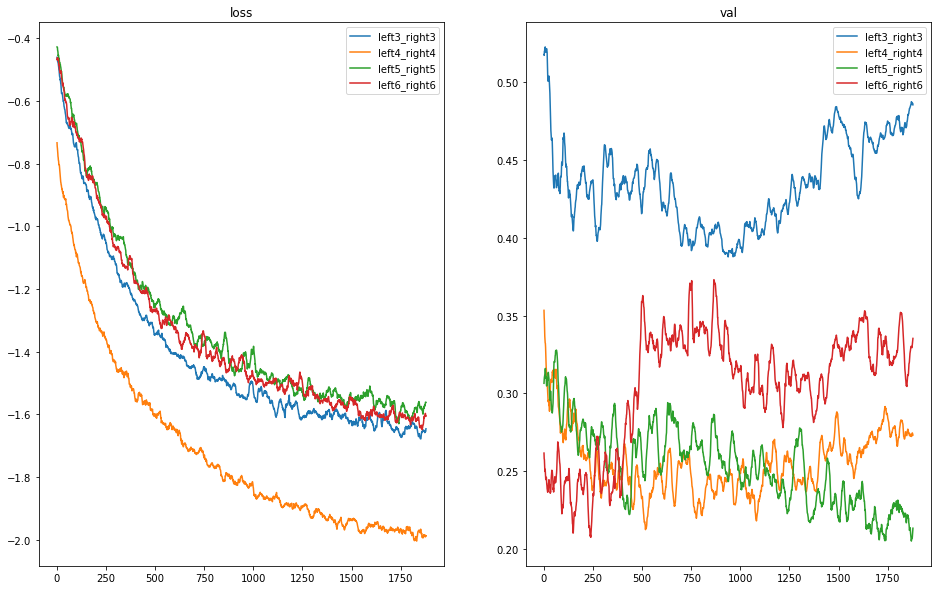

In [114]:
fig, ax = plt.subplots(nrows=1, sharex=True, ncols=2)
fig.set_figwidth(16)
fig.set_figheight(10)

def smooth(vec):
    res = []
    window = 10
    step = 1
    for i in range(window, len(vec)-window, step):
        res.append(np.mean(vec[i-window:i+window+1]))
    return res

cur_hist = best_hist
best_models = sorted([(h, np.mean(cur_hist[h].history["val_loss"][-5:])) for h in cur_hist], key=lambda x: x[1])[:8]

for i, (h, _) in enumerate(sorted(best_models)):
    ax[0].plot(np.log2(smooth(cur_hist[h].history["loss"][100:])), label=h)
    ax[1].plot(np.log2(smooth(cur_hist[h].history["val_loss"][100:])), label=h)


ax[0].set_title("loss")
ax[1].set_title("val")
ax[0].legend()
ax[1].legend()

plt.savefig("loss_xy_dense2layer_onehot_2000it.png")

In [115]:
def to_vec_onehot(df, df_add, left_window, right_window):
    X = np.zeros((len(df)*MAX_POS, (left_window+right_window+1) * len(chars)), dtype=bool)
    y = np.zeros((len(df)*MAX_POS, 2), dtype=np.float32)
    for seq_i, seq in enumerate(df["sequence"]):
        seq = "X"*left_window + seq + "X"*right_window
        for index, target_pos in enumerate(range(left_window + 1, len(seq) - right_window)):
            target_aa = seq[target_pos]
            for amb_pos, amb_aa in enumerate(seq[target_pos-left_window : target_pos+right_window+1]):
                if amb_aa != "X":
                    X[seq_i*MAX_POS + index, amb_pos*len(chars):(amb_pos+1)*len(chars)] = one_hot[amb_aa]
            y[seq_i*MAX_POS + index, 0] = df[[4 + index]].iloc[seq_i]
            y[seq_i*MAX_POS + index, 1] = df_add[[4 + index]].iloc[seq_i]
    return X, y


df_cdr = pd.read_csv("data/cdr_coord_x.csv.gz")
df_can = pd.read_csv("data/can_coord_x.csv.gz")

df_cdr_add = pd.read_csv("data/cdr_coord_y.csv.gz")
df_can_add = pd.read_csv("data/can_coord_y.csv.gz")

X_can, y_can = to_vec_onehot(df_can, df_can_add, 5, 5)
X_cdr, y_cdr = to_vec_onehot(df_cdr, df_cdr_add, 5, 5)

model = dense_model((20*(5+5+1),), 2, [128, 64])

model.fit(X_can, y_can, batch_size=128, epochs=2000, verbose=0, validation_data=(X_cdr, y_cdr))

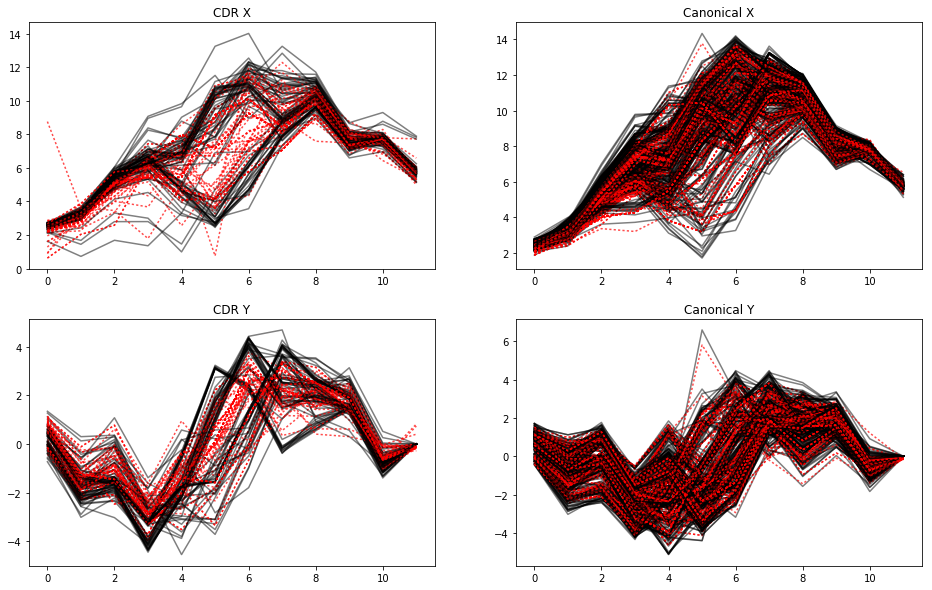

In [119]:
# Predicted and real coordinates
fig, ax = plt.subplots(nrows=2, ncols=2)
fig.set_figwidth(16)
fig.set_figheight(10)


pred = model.predict(X_cdr)
pred_x, pred_y = pred[:,0], pred[:,1]

df_cdr = pd.read_csv("data/cdr_coord_x.csv.gz")
trans = pred_x.reshape((len(df_cdr),12))
for i in range(len(df_cdr)):
    ax[0][0].plot(range(12), df_cdr.iloc[i,4:16], c="black", alpha=.5, label="real")
    ax[0][0].plot(trans[i,:], c = "red", linestyle="dotted", alpha=.7, label="pred")
ax[0][0].set_title("CDR X")

df_cdr = pd.read_csv("data/cdr_coord_y.csv.gz")
trans = pred_y.reshape((len(df_cdr),12))
for i in range(len(df_cdr)):
    ax[1][0].plot(range(12), df_cdr.iloc[i,4:16], c="black", alpha=.5, label="real")
    ax[1][0].plot(trans[i,:], c = "red", linestyle="dotted", alpha=.7, label="pred")
ax[1][0].set_title("CDR Y")

    
pred = model.predict(X_can)
pred_x, pred_y = pred[:,0], pred[:,1]

df_can = pd.read_csv("data/can_coord_x.csv.gz")
trans = pred_x.reshape((len(df_can),12))
for i in range(len(df_can)):
    ax[0][1].plot(range(12), df_can.iloc[i,4:16], c="black", alpha=.5, label="real")
    ax[0][1].plot(trans[i,:], c = "red", linestyle="dotted", alpha=.7, label="pred")
ax[0][1].set_title("Canonical X")

df_can = pd.read_csv("data/can_coord_y.csv.gz")
trans = pred_y.reshape((len(df_can),12))
for i in range(len(df_can)):
    ax[1][1].plot(range(12), df_can.iloc[i,4:16], c="black", alpha=.5, label="real")
    ax[1][1].plot(trans[i,:], c = "red", linestyle="dotted", alpha=.7, label="pred")
ax[1][1].set_title("Canonical Y")

plt.savefig("pred_xy_dense2layer_onehot_2000it.png")

In [140]:
pred = model.predict(X_cdr)
pred_x, pred_y = pred[:,0], pred[:,1]
pred_x[11]

1.6212753